## Quartile und Interquartilsbereich
----------------------------------------

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp

%run ../src/notebook_env.py


---------------------------------
Working on the host: LAPTOP-9LETB4SJ

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Mar  8 2022, 15:52:24) [MSC v.1929 64 bit (AMD64)]

---------------------------------
Python interpreter: C:\Users\zak\anaconda3\envs\srh\python.exe


**Quartile** unterteilen einen geordneten Datensatz in **vier gleiche Teile**. Diese drei Maße werden als **erstes Quartil** $(Q1)$, **zweites Quartil** $(Q2)$ und **drittes Quartil** $(Q3)$ bezeichnet. Das zweite Quartil ist dasselbe wie der Median eines Datensatzes. Das erste Quartil ist der Wert des mittleren Terms unter den Beobachtungen, die kleiner als der Median sind, und das dritte Quartil ist der Wert des mittleren Terms unter den Beobachtungen, die größer als der Median sind ({cite:p}`fahrmeirstatistik` s.59).

![Alt-Text](median.png)

Ungefähr $25 \%$ der Werte in einem geordneten Datensatz sind kleiner als $Q1$ und etwa $75 \%$ sind größer als $Q1$. Das zweite Quartil, $Q2$, unterteilt einen geordneten Datensatz in zwei gleiche Teile; daher sind das zweite Quartil und der Median identisch. Etwa $75 \%$ der Datenwerte sind kleiner als $Q3$ und etwa $25 \%$ sind größer als $Q3$. Die Differenz zwischen dem dritten Quartil und dem ersten Quartil eines Datensatzes wird als **Interquartilsbereich** ($IQR$) bezeichnet ({cite:p}`fahrmeirstatistik` s.61).

$$ IQR=Q3−Q1 $$

Wechseln wir zu Python und testen wir seine Funktionalität zur Berechnung von Quantilen/Quartilen. Wir werden die `nc.score`-Variable des `students` Datensatzes verwenden, um Quartile und den $IQR$ zu berechnen. Die `nc.score`-Variable entspricht der <a href="https://de.wikipedia.org/wiki/Numerus_clausus">Numerus-Clausus</a>-Punktzahl jedes Studenten.

Zunächst werden die Daten unterteilt und ein Histogramm erstellt, um die Verteilung der Variablen genauer zu untersuchen.

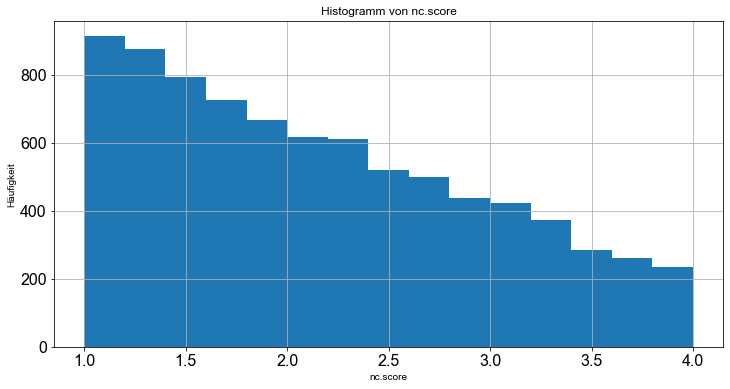

In [5]:
# Lese Daten aus students.csv ein
df=pd.read_csv('students.csv')

# Plotte die Liste als Histogramm
df['nc.score'].hist(bins = 15)
plt.xlabel("nc.score")
plt.ylabel("Häufigkeit")
plt.title("Histogramm von nc.score")
plt.show()

Um die Quartile für die Variable nc.score zu berechnen, wenden wir die Funktion `np.quantile` an. Um die Quartile für die Variable `nc.score` zu berechnen, schreiben wir also einfach:

In [6]:
# Berechne Quartile Werte mit Funktion numpy.quantile(data,percentage)
print("Q1 Quantile des nc.score  : ", np.quantile(df['nc.score'], 0.25))
print("Q2 Quantile des nc.score : ", np.quantile(df['nc.score'], 0.5))
print("Q3 Quantile des nc.score  : ", np.quantile(df['nc.score'], 0.75))
print("Q4 Quantile des nc.score  : ", np.quantile(df['nc.score'], 1.0))



Q1 Quantile des nc.score  :  1.46
Q2 Quantile des nc.score :  2.04
Q3 Quantile des nc.score  :  2.78
Q4 Quantile des nc.score  :  4.0


**Hinweis:** Nicht alle Statistiker definieren Quartile auf genau dieselbe Weise. Eine ausführliche Diskussion der verschiedenen Methoden zur Berechnung von Quartilen finden Sie in dem Online-Artikel <a href="http://jse.amstat.org/v14n3/langford.html">"Quartiles in Elementary Statistics" von E. Langford (2006)</a>.

Um den $IQR$ für die Variable `nc.score` zu berechnen, schreiben wir entweder...

In [7]:
# Berechne Interquartil Abstand mit Funktion np.percentile() 
q3, q1 = np.percentile(df['nc.score'], [75 ,25])
iqr = q3 - q1
iqr

1.3199999999999998

...oder wir wenden die eingebaute Funktion `scipy.stats.iqr` aus dem Paket `scipy.stats` an:

In [8]:
sp.stats.iqr(df['nc.score'],rng=(25, 75))

C:\Users\zak\AppData\Local\Temp\ipykernel_20960\2549839392.py:1: DeprecationWarning: Please use `iqr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  sp.stats.iqr(df['nc.score'],rng=(25, 75))


1.3199999999999998

Wir können die Aufteilung der Variablen `nc.score` in Quartile visualisieren, indem wir ein Histogramm erstellen und ein paar zusätzliche Codezeilen hinzufügen.

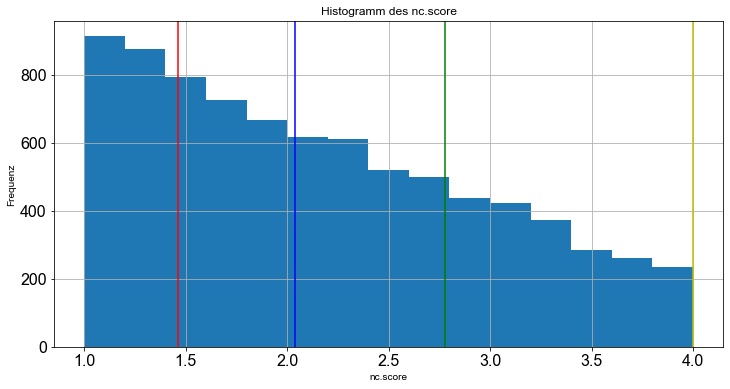

In [9]:
# Plotte die Liste als Histogramm mit Quartilen
df['nc.score'].hist(bins = 15)
plt.xlabel("nc.score")
plt.ylabel("Frequenz")
plt.title("Histogramm des nc.score")

# Zeiche vertikale Linien bei Q1, Q2, Q3, Q4

plt.axvline(x=np.quantile(df['nc.score'], 0.25), color='r', linestyle='-')
plt.axvline(x=np.quantile(df['nc.score'], 0.5), color='b', linestyle='-')
plt.axvline(x=np.quantile(df['nc.score'], 0.75), color='g', linestyle='-')
plt.axvline(x=np.quantile(df['nc.score'], 1.0), color='y', linestyle='-')
plt.show()